In [ ]:
import keras
import tensorflow as tf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, LSTM, Bidirectional, BatchNormalization, Dropout
from keras.optimizers import Adagrad
from keras.regularizers import l2

In [ ]:
models_data_columns = ['Model', 'Train accuracy', 'Val accuracy', 'Train loss', 'Val_loss', 'Test accuracy', 'Test_loss', 'Training time [s]']
models_data = []
histories = []
max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_GRU = Sequential([
    Embedding(max_features, 32),
    GRU(32),
    Dense(1, activation='sigmoid'),
])

model_GRU.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
start = datetime.now()
history1 = model_GRU.fit(
    input_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.3
)
finish = datetime.now()
final_time = finish - start
print(final_time)
histories.append(history1)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 589ms/step - acc: 0.9347 - loss: 0.1736 - val_acc: 0.8244 - val_loss: 0.4815
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 64s 454ms/step - acc: 0.9350 - loss: 0.1726 - val_acc: 0.7800 - val_loss: 0.6283
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 66s 485ms/step - acc: 0.9403 - loss: 0.1627 - val_acc: 0.8799 - val_loss: 0.3216
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 60s 437ms/step - acc: 0.9425 - loss: 0.1553 - val_acc: 0.8803 - val_loss: 0.3402
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 67s 487ms/step - acc: 0.9517 - loss: 0.1404 - val_acc: 0.8780 - val_loss: 0.3258
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 60s 436ms/step - acc: 0.9597 - loss: 0.1133 - val_acc: 0.8868 - val_loss: 0.3566
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 88s 480ms/step - acc: 0.9635 - loss: 0.1015 - val_acc: 0.8808 - val_loss: 0.3488
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 445ms/step - acc: 0.9628 - loss: 0.1050 - val_acc: 0.8576 - val_loss: 0.4563
Epoch 9/20
137/137 ━━━━━━━━━━━━━

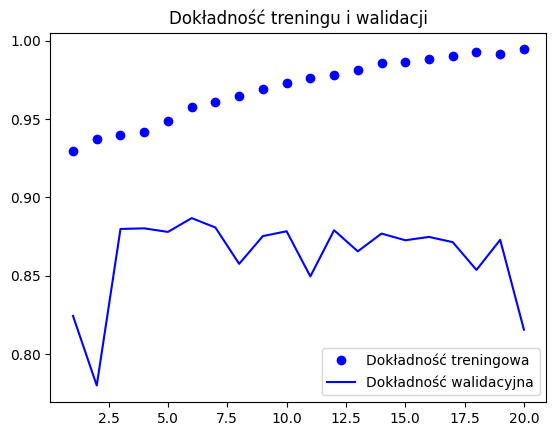

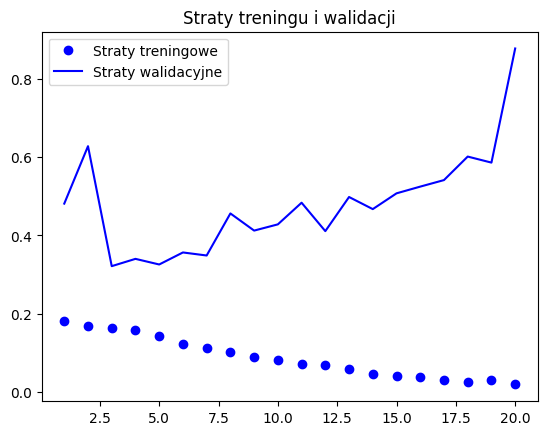

In [ ]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train and Val loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_GRU.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - acc: 0.8086 - loss: 0.9175


In [ ]:
models_data.append([
    'GRU',
    acc[-1],
    val_acc[-1],
    loss[-1],
    val_loss[-1],
    test_acc,
    test_loss,
    final_time.seconds
])

In [ ]:
model_LSTM = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_LSTM.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']

)

In [ ]:
start = datetime.now()
history2 = model_LSTM.fit(
    input_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.3
)
finish = datetime.now()
final_time = finish - start
print(final_time)
histories.append(history2)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 406ms/step - acc: 0.5723 - loss: 0.6695 - val_acc: 0.7259 - val_loss: 0.5429
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 401ms/step - acc: 0.7980 - loss: 0.4495 - val_acc: 0.8312 - val_loss: 0.3978
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 372ms/step - acc: 0.8557 - loss: 0.3460 - val_acc: 0.8545 - val_loss: 0.3523
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 364ms/step - acc: 0.8780 - loss: 0.3060 - val_acc: 0.8649 - val_loss: 0.3177
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 369ms/step - acc: 0.8865 - loss: 0.2900 - val_acc: 0.8552 - val_loss: 0.3356
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 402ms/step - acc: 0.8981 - loss: 0.2643 - val_acc: 0.7713 - val_loss: 0.5683
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 371ms/step - acc: 0.8920 - loss: 0.2669 - val_acc: 0.8279 - val_loss: 0.4294
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 399ms/step - acc: 0.9121 - loss: 0.2333 - val_acc: 0.8639 - val_loss: 0.3186
Epoch 9/20
137/137 ━━━━━━━━━━━━━

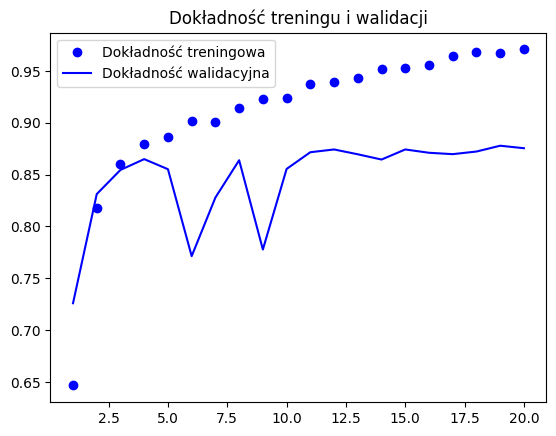

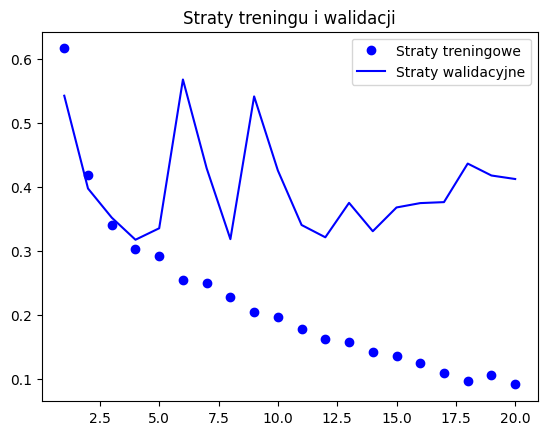

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train and Val loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_LSTM.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - acc: 0.8692 - loss: 0.4379


In [ ]:
models_data.append([
    'LSTM',
    acc[-1],
    val_acc[-1],
    loss[-1],
    val_loss[-1],
    test_acc,
    test_loss,
    final_time.seconds
])

In [ ]:
model_bidirectional = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model_bidirectional.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [ ]:
start = datetime.now()
history3 = model_bidirectional.fit(
    input_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.3
)
finish = datetime.now()
final_time = finish - start
print(final_time)
histories.append(history3)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 91s 642ms/step - acc: 0.5464 - loss: 0.6785 - val_acc: 0.6088 - val_loss: 0.7080
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 89s 651ms/step - acc: 0.7920 - loss: 0.4670 - val_acc: 0.8264 - val_loss: 0.3943
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 139s 633ms/step - acc: 0.8511 - loss: 0.3610 - val_acc: 0.8508 - val_loss: 0.3552
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 143s 638ms/step - acc: 0.8639 - loss: 0.3324 - val_acc: 0.8793 - val_loss: 0.2993
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 89s 653ms/step - acc: 0.8913 - loss: 0.2780 - val_acc: 0.8337 - val_loss: 0.4177
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 87s 638ms/step - acc: 0.8942 - loss: 0.2700 - val_acc: 0.8820 - val_loss: 0.2926
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 142s 639ms/step - acc: 0.9084 - loss: 0.2377 - val_acc: 0.8641 - val_loss: 0.3471
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 142s 638ms/step - acc: 0.9196 - loss: 0.2201 - val_acc: 0.8864 - val_loss: 0.2899
Epoch 9/20
137/137 ━━━━━━━━━

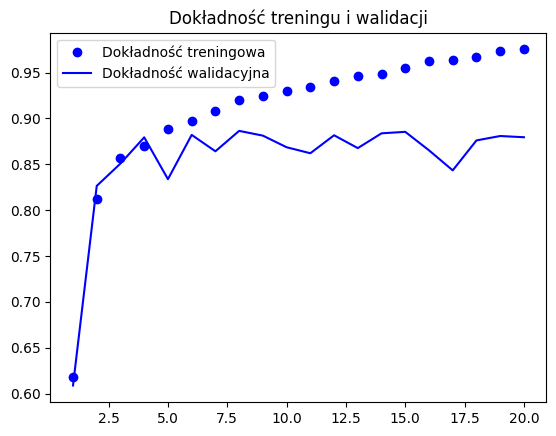

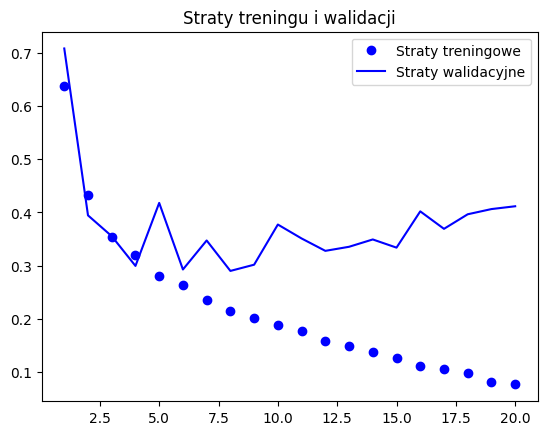

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train and Val loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_bidirectional.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - acc: 0.8676 - loss: 0.4565


In [ ]:
models_data.append([
    'Bidirectional',
    acc[-1],
    val_acc[-1],
    loss[-1],
    val_loss[-1],
    test_acc,
    test_loss,
    final_time.seconds
])

In [ ]:
model_DRNN = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model_DRNN.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [ ]:
start = datetime.now()
history4 = model_bidirectional.fit(
    input_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.3
)
finish = datetime.now()
final_time = finish - start
print(final_time)
histories.append(history4)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 90s 658ms/step - acc: 0.9778 - loss: 0.0723 - val_acc: 0.8688 - val_loss: 0.4132
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 140s 643ms/step - acc: 0.9853 - loss: 0.0504 - val_acc: 0.8753 - val_loss: 0.4283
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 94s 688ms/step - acc: 0.9811 - loss: 0.0611 - val_acc: 0.8477 - val_loss: 0.4994
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 143s 696ms/step - acc: 0.9877 - loss: 0.0416 - val_acc: 0.8784 - val_loss: 0.4622
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 153s 779ms/step - acc: 0.9829 - loss: 0.0557 - val_acc: 0.8789 - val_loss: 0.4892
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 96s 703ms/step - acc: 0.9883 - loss: 0.0381 - val_acc: 0.8716 - val_loss: 0.4990
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 136s 662ms/step - acc: 0.9891 - loss: 0.0369 - val_acc: 0.7459 - val_loss: 1.5435
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 101s 738ms/step - acc: 0.9816 - loss: 0.0766 - val_acc: 0.8707 - val_loss: 0.4840
Epoch 9/20
137/137 ━━━━━━━━

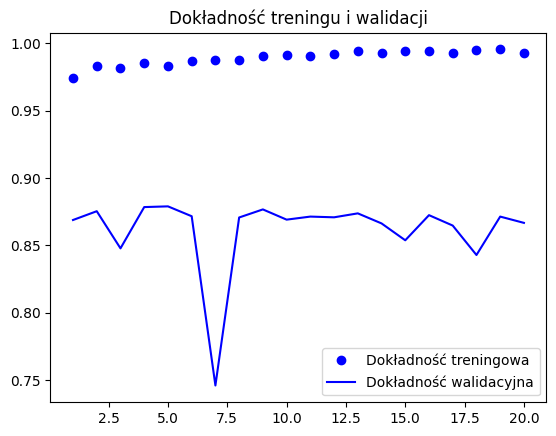

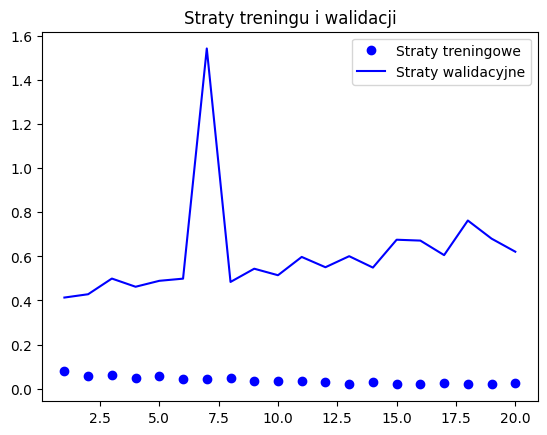

In [ ]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train and Val loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_DRNN.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 158ms/step - acc: 0.4919 - loss: 0.6934


In [ ]:
models_data.append([
    'DRNN',
    acc[-1],
    val_acc[-1],
    loss[-1],
    val_loss[-1],
    test_acc,
    test_loss,
    final_time.seconds
])

In [ ]:
print(models_data)
print(histories)

[['GRU', 0.9944000244140625, 0.8155999779701233, 0.019057950004935265, 0.8781038522720337, 0.8091599941253662, 0.9234578013420105, 1504], ['LSTM', 0.9707428812980652, 0.8754666447639465, 0.09135046601295471, 0.4126480519771576, 0.8700399994850159, 0.43784281611442566, 1337], ['Bidirectional', 0.9751428365707397, 0.8794666528701782, 0.07646244764328003, 0.4114411771297455, 0.8682399988174438, 0.4547140598297119, 2519], ['DRNN', 0.99314284324646, 0.8666666746139526, 0.0253438763320446, 0.6212832927703857, 0.49823999404907227, 0.6932417154312134, 2636]]
[<keras.src.callbacks.history.History object at 0x7bab8ba0abc0>, <keras.src.callbacks.history.History object at 0x7bab8df05810>, <keras.src.callbacks.history.History object at 0x7bab90ed9a50>, <keras.src.callbacks.history.History object at 0x7bab8df06200>]


In [ ]:
models_frame = pd.DataFrame(models_data)
models_frame.columns = models_data_columns

In [ ]:
print(models_frame)
'''From the table, it appears that the most optimal model with these parameters
would be a simple LSTM model, achieving a final test accuracy of 0.87. All models
show significant overfitting, which will be noticeable in the charts plotted in
the following code cells. In terms of time, there were no surprises—the more
complex the model, the longer the training took.'''

           Model  Train accuracy  Val accuracy  Train loss  Val_loss  \
0            GRU        0.994400      0.815600    0.019058  0.878104   
1           LSTM        0.970743      0.875467    0.091350  0.412648   
2  Bidirectional        0.975143      0.879467    0.076462  0.411441   
3           DRNN        0.993143      0.866667    0.025344  0.621283   

   Test accuracy  Test_loss  Training time [s]  
0        0.80916   0.923458               1504  
1        0.87004   0.437843               1337  
2        0.86824   0.454714               2519  
3        0.49824   0.693242               2636  


In [ ]:
colors = ['red', 'green', 'blue', 'yellow']
epochs = range(1, 21)
models_names = ['GRU', 'LSTM', 'Bidirectional', 'DRNN']

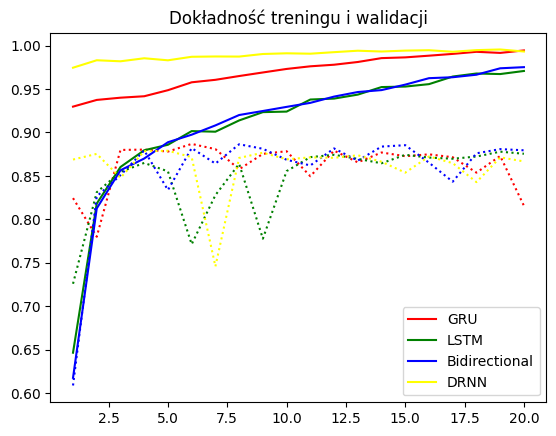

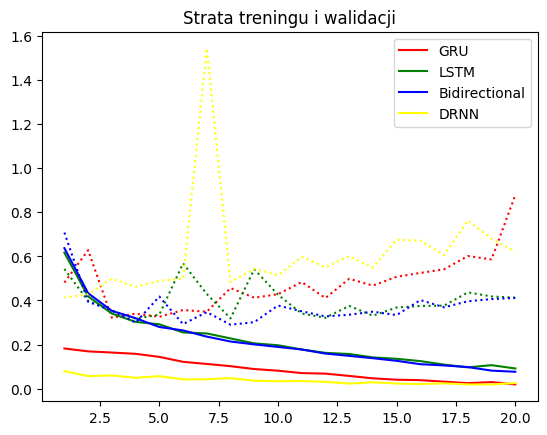

In [ ]:
plt.figure()
for hist, color, name in zip(histories, colors, models_names):
    plt.plot(epochs, hist.history['acc'], c=color, linestyle='-', label=name)
    plt.plot(epochs, hist.history['val_acc'], c=color, linestyle=':')
    plt.legend()
plt.title('Train and Validation Accuracy')
plt.show()

plt.figure()
for hist, color, name in zip(histories, colors, models_names):

    plt.plot(epochs, hist.history['loss'], c=color, linestyle='-', label=name)
    plt.plot(epochs, hist.history['val_loss'], c=color, linestyle=':')
    plt.legend()
plt.title('Train and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
model_DRNN2 = Sequential([
    Embedding(max_features, 32, embeddings_regularizer=l2(0.01)),
    Dropout(0.3),
    Bidirectional(LSTM(16, kernel_regularizer=l2(0.01))),
    Dropout(0.35),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.35),
    Dense(1, activation='sigmoid')
])

model_DRNN2.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=0.00007, weight_decay=0.01),
    loss='binary_crossentropy',
    metrics=['acc']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

start = datetime.now()
history5 = model_DRNN2.fit(
    input_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.4,
    callbacks=[early_stopping, reduce_lr]
)
finish = datetime.now()
final_time = finish - start
print(final_time)
histories.append(history5)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 172s 349ms/step - acc: 0.4946 - loss: 3.5413 - val_acc: 0.5147 - val_loss: 2.0177 - learning_rate: 7.0000e-05
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 166s 353ms/step - acc: 0.5289 - loss: 1.8254 - val_acc: 0.5707 - val_loss: 1.4379 - learning_rate: 7.0000e-05
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 347ms/step - acc: 0.5544 - loss: 1.3637 - val_acc: 0.6544 - val_loss: 1.1698 - learning_rate: 7.0000e-05
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 168s 359ms/step - acc: 0.6307 - loss: 1.1235 - val_acc: 0.7056 - val_loss: 0.9678 - learning_rate: 7.0000e-05
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 161s 342ms/step - acc: 0.8105 - loss: 0.8141 - val_acc: 0.8631 - val_loss: 0.6527 - learning_rate: 7.0000e-05
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 206s 352ms/step - acc: 0.8757 - loss: 0.6392 - val_acc: 0.8651 - val_loss: 0.5877 - learning_rate: 7.0000e-05
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 347ms/step - acc: 0.8895 - loss: 0.5517 - val_acc: 0.88

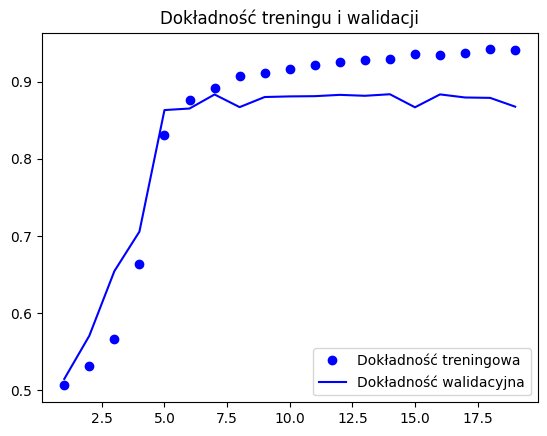

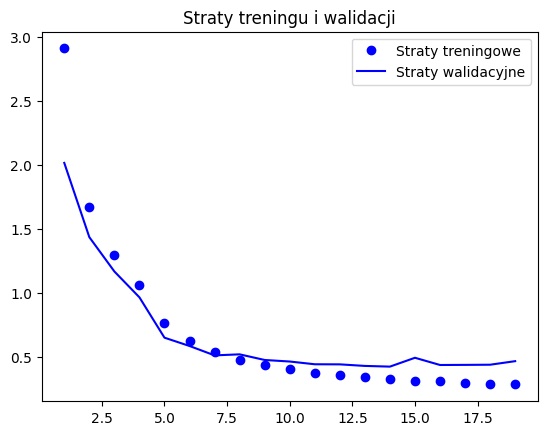

In [ ]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train and Val loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_DRNN2.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - acc: 0.8728 - loss: 0.4441


In [ ]:
models_data.append([
    'DRNN 2',
    acc[-1],
    val_acc[-1],
    loss[-1],
    val_loss[-1],
    test_acc,
    test_loss,
    final_time.seconds
])

In [ ]:
models_frame = pd.DataFrame(models_data)
models_frame.columns = models_data_columns

In [ ]:
print(models_frame)

    Model  Train accuracy  Val accuracy  Train loss  Val_loss  Test accuracy  \
0  DRNN 2          0.9524      0.865867    0.175356  0.461474         0.8568   

   Test_loss  Training time [s]  
0    0.48406               6339  
